# DS-SF-23 | Codealong 05 | Inferential Statistics for Model Fit

## Inferential Statistics | Motivating Example

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv(os.path.join('..', 'datasets', 'zillow-05-start.csv'), index_col = 'ID')

We are using our usual SF housing dataset but we added two new variables `M1` and `M2` to it.

In [3]:
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,Size,LotSize,BuiltInYear,M1,M2
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,710000.0,0.0,1.0,...,550.0,NaN,1980.0,1.099658,0.097627
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2150000.0,0.0,NaN,...,1430.0,2435.0,1948.0,3.687657,0.430379
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5600000.0,0.0,2.0,...,2040.0,3920.0,1976.0,8.975475,0.205527
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1500000.0,0.0,1.0,...,1060.0,NaN,1930.0,2.317325,0.089766
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,970000.0,0.0,2.0,...,1299.0,NaN,1993.0,1.380945,-0.152690
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,390000.0,1.0,NaN,...,264.0,NaN,2012.0,0.428094,-0.804647
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,860000.0,0.0,1.0,...,691.0,NaN,2004.0,1.302833,0.029844
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,830000.0,0.0,3.0,...,1738.0,2299.0,1976.0,1.608882,0.876824


### Exploratory Analysis on `M1` and `M2` and how they relate to `SalePrice`

In [4]:
df[['SalePrice','M1','M2']].corr()

,SalePrice,M1,M2
SalePrice,1.000000,0.970612,0.022003
M1,0.970612,1.000000,0.166624
M2,0.022003,0.166624,1.000000


In [5]:
df.corr()

,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear,M1,M2
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.392418,-0.148598,0.970612,0.022003
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.012622,-0.050258,0.004113,-0.043870
BedCount,0.379453,NaN,1.000000,0.715194,0.722656,0.070542,-0.344700,0.370483,0.001504
BathCount,0.369938,-0.078195,0.715194,1.000000,0.692501,0.108556,-0.078157,0.323544,-0.004046
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.201979,-0.313989,0.434626,0.015807
LotSize,0.392418,-0.012622,0.070542,0.108556,0.201979,1.000000,0.046411,0.290286,0.005383
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.046411,1.000000,-0.146299,-0.022441
M1,0.970612,0.004113,0.370483,0.323544,0.434626,0.290286,-0.146299,1.000000,0.166624
M2,0.022003,-0.043870,0.001504,-0.004046,0.015807,0.005383,-0.022441,0.166624,1.000000


M1 = Size/Bath/Bed, has a high correlation to SalePrice
M2 = low correlation to SalePrice, seems to be related to M1


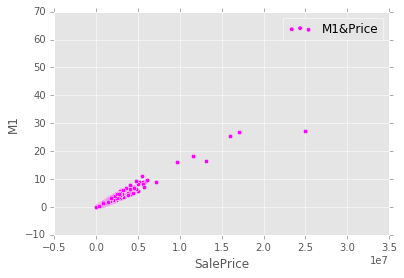

In [31]:
m1_price = df[['SalePrice', 'M1']]
m1_price.plot(kind='scatter', x='SalePrice',y ='M1', label='M1&Price', color ='Magenta')

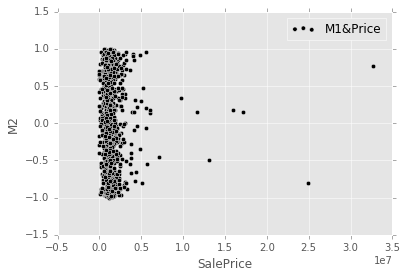

In [6]:
m2_price = df[['SalePrice', 'M2']]
m2_price.plot(kind='scatter', x='SalePrice',y ='M2', label='M1&Price', color ='Black')

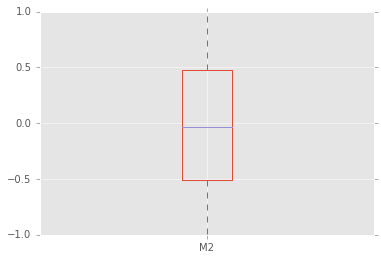

In [7]:
df['M2'].plot(kind = 'box')

### Your first Machine Learning Models!

#### Machine Learning Model #1 | `SalePrice` as a function of `M1`

In [12]:
X = df[ ['M1'] ] #x wants to always be a dataframe
y = df.SalePrice #y would want to be a series all the time -- do the df.column as oppose to df[['column']]

model = smf.OLS(y, X).fit() #numpyZAmodel = smf.OLS(y, X).fit() #numpyZA

#more about smf.ols - http://statsmodels.sourceforge.net/devel/
#http://setosa.io/ev/ordinary-least-squares-regression/

In [25]:
#fake_model = smf.ols('SalePrice ~ M1', data=df).fit()
#fake_model.summary()
#trying out formula but it doesn't work
#from http://statsmodels.sourceforge.net/devel/

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                 2.567e+04
Date:                Wed, 25 May 2016   Prob (F-statistic):               0.00
Time:                        07:16:21   Log-Likelihood:                -14393.
No. Observations:                1000   AIC:                         2.879e+04
Df Residuals:                     999   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
M1          6.241e+05   3894.990    160.228      0.000      6.16e+05  6.32e+05
==============================================================================
Omnibus:                     1044.296   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           901486.247
Skew:                           3.948   Prob(JB):                         0.00
Kurtosis:                     149.879   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Machine Learning Model #2 | `SalePrice` as a function of `M2`

In [26]:
X = df[['M2']]
Y = df.SalePrice

model = smf.OLS(X, Y).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     M2   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.06941
Date:                Wed, 25 May 2016   Prob (F-statistic):              0.792
Time:                        07:36:46   Log-Likelihood:                -876.34
No. Observations:                1000   AIC:                             1755.
Df Residuals:                     999   BIC:                             1760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
SalePrice   2.174e-09   8.25e-09      0.263      0.792      -1.4e-08  1.84e-08
==============================================================================
Omnibus:                      754.840   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.997
Skew:                           0.064   Prob(JB):                     5.68e-14
Kurtosis:                       1.797   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""